# Exercises for Bayesian Statistics

The following script is the solution the exercises for the probability theory section (ie. the exercises 12-16) of the course 'Statistics for Data Science' (WS 19/20) by Prof. Ostwald. The exercise sheets can be found at the website https://www.ewi-psy.fu-berlin.de/einrichtungen/arbeitsbereiche/computational_cogni_neurosc/teaching/Statistics_for_Data_Science_19_20.html.

## Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# For reproducibility, fix seed.
np.random.seed(42)

## 12. Foundations and Conjugate Inference

### 1. Batch vs. Recursive Bayesian Estimation for Beta-Binomial Model

For the beta-binomial model, we'll have three steps:

1) Choose Prior: Choose beta distribution $P(\theta)$.

2) Likelihood: Generate Data with binomial distribution, $P(x|\theta)$.

3) Make Posterior. $P(\theta|x) \propto P(x|\theta) P(\theta)$.

In [3]:
from scipy.stats import binom
from scipy.stats import beta

#### 1. Prior

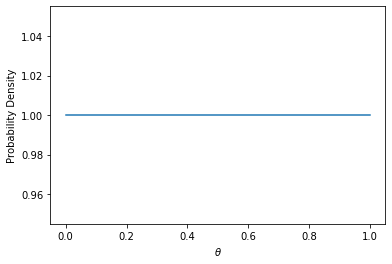

In [4]:
theta_range = np.linspace(0, 1, 1000)
theta_range_plus_eps = theta_range + 0.001
a = 1
b = 1

# Visualization.
prior = beta.pdf(x = theta_range, a = a, b = b)
plt.plot(theta_range, prior)
plt.xlabel(r"$\theta$")
plt.ylabel('Probability Density')

# Taking difference of cdfs as we need to have probability (here PMF)
# not the density given by beta.pdf for further calculations.
prior = beta.cdf(x = theta_range_plus_eps, a = a, b = b) - beta.cdf(x = theta_range, a = a, b = b) 

#### 2. Likelihood

In [5]:
# Generate data
n = 10
theta_unknown = 0.3
n_pos = np.random.binomial(n, theta_unknown)
n_pos

2

Text(0, 0.5, 'Probability')

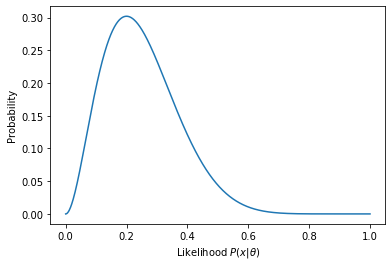

In [6]:
likelihood = binom.pmf(k = n_pos, n = n, p = theta_range) 
plt.plot(theta_range, likelihood)
plt.xlabel(r"Likelihood $P(x|\theta)$")
plt.ylabel("Probability")

#### 3. Posterior

In [7]:
posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

Text(0, 0.5, 'Probability')

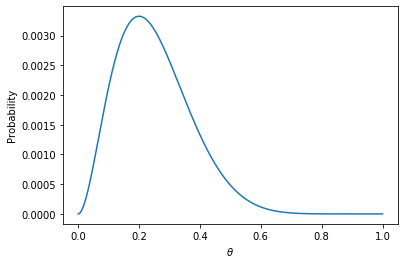

In [8]:
plt.plot(theta_range, normalized_posterior)
plt.xlabel(r"$\theta$")
plt.ylabel("Probability")

### 2. Bias and Consistency Properties of the Posterior Expected Value (Beta-Binomial Model)

### 3. Bias and Consistency Properties of the Posterior Expected Value (Gaussian-Gaussian Model)